# The Python ecosystem - The SciPy library

The [SciPy library](https://www.scipy.org/scipylib/index.html) is one of the core packages that make up the [SciPy stack](https://www.scipy.org/) (a Python-based ecosystem of open-source software for mathematics, science, and engineering). It provides many user-friendly and efficient numerical routines such as routines for numerical integration and optimization.

SciPy is a collection of mathematical algorithms and convenience functions built on the Numpy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data. With SciPy an interactive Python session becomes a data-processing and system-prototyping environment rivaling systems such as MATLAB, IDL, Octave, R-Lab, and SciLab.

SciPy is organized into subpackages covering different scientific computing domains. These are summarized in the following table:

Subpackage | Description
--- | ---
cluster | Clustering algorithms
constants | Physical and mathematical constants
fftpack | Fast Fourier Transform routines
integrate | Integration and ordinary differential equation solvers
interpolate | Interpolation and smoothing splines
io | Input and Output
linalg | Linear algebra
ndimage | N-dimensional image processing
odr | Orthogonal distance regression
optimize | Optimization and root-finding routines
signal | Signal processing
sparse | Sparse matrices and associated routines
spatial | Spatial data structures and algorithms
special | Special functions
stats | Statistical distributions and functions

## Physical and mathematical constants (`scipy.constants`)

[Constants at SciPy's online documentation](https://docs.scipy.org/doc/scipy/reference/constants.html)

In [1]:
import scipy.constants as c 

In [13]:
c.astronomical_unit

149597870691.0

In [22]:
# speed_of_sound, one Mach (approx., at 15 C, 1 atm) in meters per second
c.speed_of_sound

340.5

In [5]:
# speed of light in vacuum (m/s)
c.speed_of_light

299792458.0

In [6]:
# one light year in meters
c.light_year

9460730472580800.0

In [7]:
# one mile in meters
c.mile

1609.3439999999998

In [8]:
# one nautical mile in meters
c.nautical_mile

1852.0

In [9]:
# one knot in meters per second
c.knot

0.5144444444444445

## 1d-Interpolation (`scipy.interpolate`)

[Interpolation at SciPy's online documentation](https://docs.scipy.org/doc/scipy/reference/interpolate.html)

In [24]:
# Import libraries
import matplotlib.pyplot as plt  
import numpy as np 
from scipy.interpolate import interp1d 

In [25]:
# Generate data
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)

In [3]:
print("x: ", x)
print("y: ", y)

x:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
y:  [ 1.          0.99383351  0.90284967  0.54030231 -0.20550672 -0.93454613
 -0.65364362  0.6683999   0.67640492 -0.91113026  0.11527995]


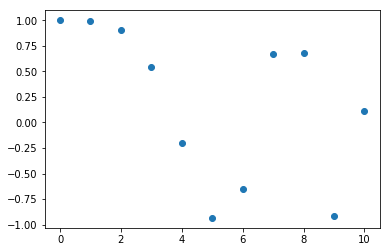

In [4]:
plt.plot(x, y, 'o');

Using the [`interp1d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) function for interpolation. 

In [26]:
# defaut uses linear interpolation
f1 = interp1d(x, y)
# specifieing a cubic interpolation
f2 = interp1d(x, y, kind='cubic')

In [27]:
# gereate new data
xnew = np.linspace(start=0, stop=10, num=200)

In [29]:
# apply interpolation algorithm
inter1 =  f1(xnew)
inter2 =  f2(xnew)

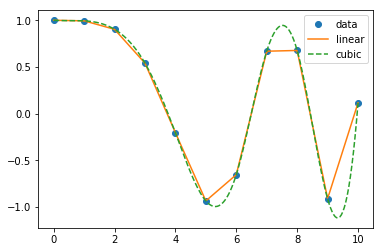

In [37]:
# plot results
fig, ax = plt.subplots()
ax.plot(x, y, 'o')
ax.plot(xnew, inter1, '-')
ax.plot(xnew, inter2 , '--')
ax.legend(['data', 'linear', 'cubic'], loc='best');